# 8. 그래프 만들기
# 8-1. 파이썬으로 만들 수 있는 그래프 살펴 보기
- seaborn
- Gallery에 다양한 그래프 살펴보기

<Axes: xlabel='timepoint', ylabel='signal'>

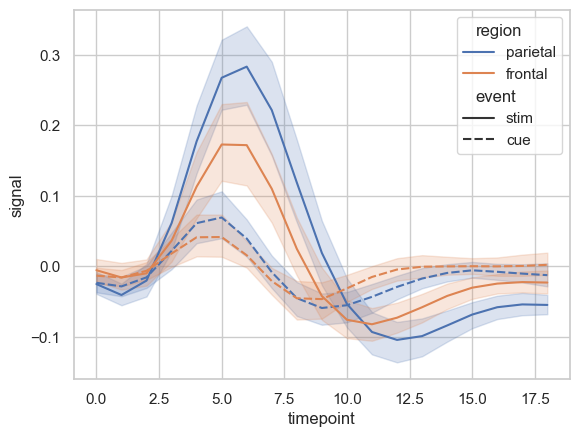

In [1]:
import seaborn as sns
sns.set_theme(style ="whitegrid")
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint",y="signal",hue="region",style='event',data=fmri)

C:\Users\nari\AppData\Local\Temp\ipykernel_17636\1883867684.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for artist in g.legend.legendHandles:


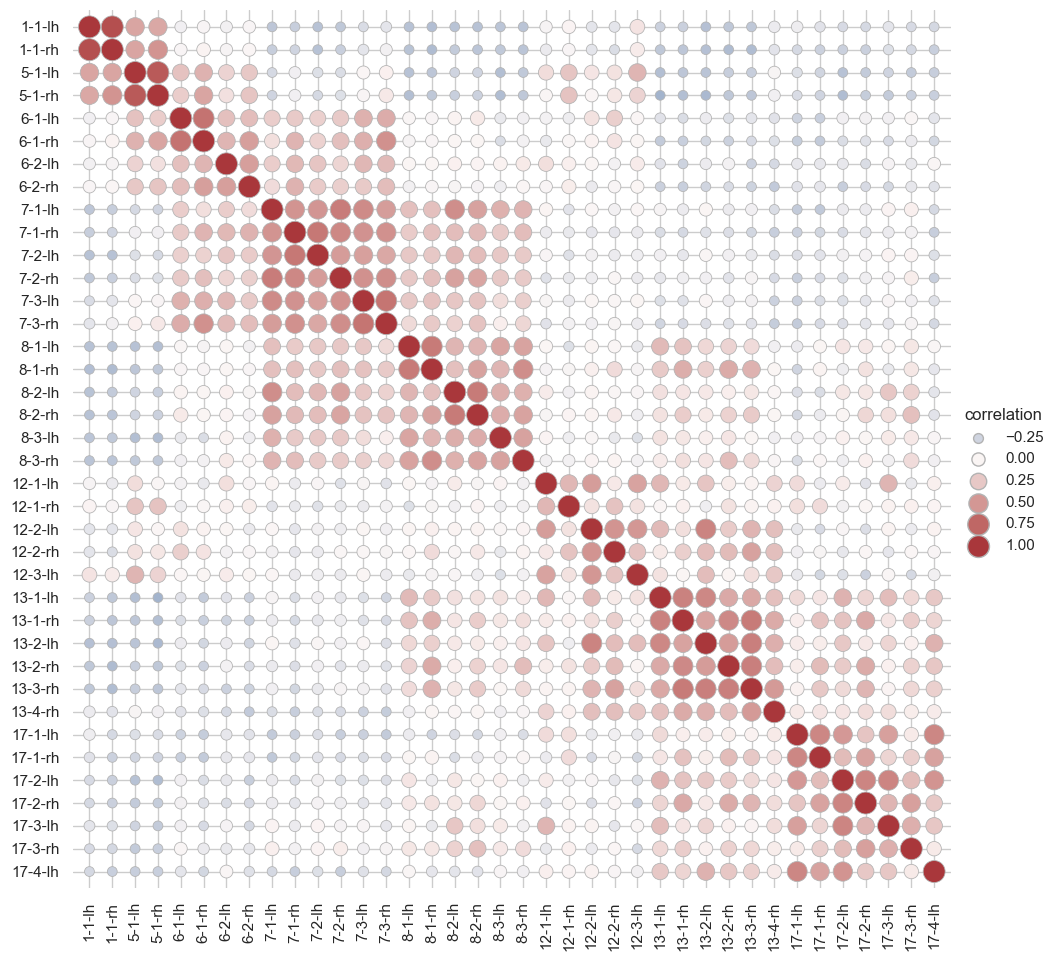

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
.get_level_values("network")
.astype(int)
.isin(used_networks))
df = df.loc[:, used_columns]
df.columns = df.columns.map("-".join)
# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
data=corr_mat,
x="level_0", y="level_1", hue="correlation", size="correlation",
palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [3]:
import seaborn as sns
# 미리설정할것
# graph 관련 warning 이 나오지 않게 세팅하기
import warnings
warnings.filterwarnings(action='ignore')
#warning이 원래 기본 세팅으로 변경하기 (기본세팅 = warning 표시)
#warnings.filterwarnings(action='default')
#2. 한글 폰트 설정
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# font를 나눔고딕으로 세팅 'NanumGothic' - windows
#plt.rcParams['font.family'] = 'NanumGothic'
# 맑은고딕 - windows
#plt.rcParams['font.family'] = 'Malgun Gothic'
# 애플고딕 - Mac OS
#plt.rcParams['font.family'] = 'AppleGothic'